In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [90]:
train = pd.read_excel("Data_Train.xlsx")

In [91]:
## TO SEE MAX COLUMNS
pd.set_option("display.max_columns", None)

In [92]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [93]:
train.describe(exclude=np.number)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [94]:
train.describe(include=np.number)

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [95]:
train.shape

(10683, 11)

In [96]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [98]:
train["Duration"].value_counts().head(10)

2h 50m    550
1h 30m    386
2h 45m    337
2h 55m    337
2h 35m    329
3h        261
2h 20m    238
2h 30m    220
2h 40m    158
2h 15m    135
Name: Duration, dtype: int64

In [99]:
train.dropna(inplace=True)

## Exploratory Data Analysis

In [100]:
train["Date_of_Journey"].dtype

dtype('O')

In [101]:
train["Journey_day"]=pd.to_datetime(train["Date_of_Journey"]).dt.day

In [102]:
train["Journey_Month"]=pd.to_datetime(train["Date_of_Journey"]).dt.month

In [103]:
train["Journey_Year"]=pd.to_datetime(train["Date_of_Journey"]).dt.year

In [104]:
train.drop("Date_of_Journey",axis=1,inplace=True)

In [105]:
train["Dep_Time"]

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [106]:
train["Dep_Time_hr"]=pd.to_datetime(train["Dep_Time"]).dt.hour

train["Dep_Time_min"]=pd.to_datetime(train["Dep_Time"]).dt.minute

train.drop("Dep_Time",axis=1,inplace=True)

In [107]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [108]:
train["Arrival_Time_hr"]=pd.to_datetime(train["Arrival_Time"]).dt.hour

In [109]:
train["Arrival_Time_min"]=pd.to_datetime(train["Arrival_Time"]).dt.minute

train.drop("Arrival_Time",axis=1,inplace=True)

In [110]:
## Extracting duration values

duration=list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"  ## 0 mins
        else:
            duration[i] = "0h "+duration[i]
            


In [111]:
duration[0].split(sep="m")[0].split()[-1]

'50'

In [112]:
## Adding splitted values

duration_hr=[]
duration_min=[]
for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [113]:
train["Duration_hrs"]=duration_hr
train["Duration_mins"]=duration_min

In [114]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [115]:
train.drop("Duration",axis=1,inplace=True)

## Categorical Values

In [116]:
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [117]:
fil=train.Airline=="Jet Airways"

In [118]:
train=train[~fil]

In [119]:
fil2=train.Airline=="Jet Airways Business"

In [120]:
train=train[~fil2]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'SpiceJet'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'GoAir'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'Air Asia'),
  Text(7, 0, 'Vistara Premium economy'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Trujet')])

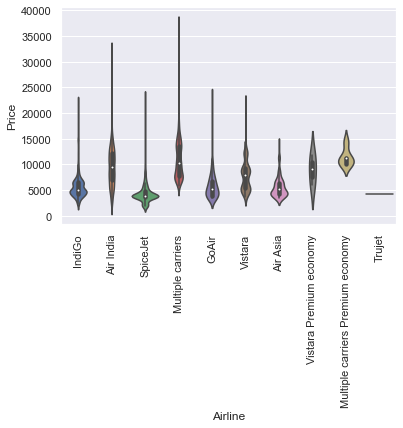

In [121]:
sns.violinplot(x="Airline",y="Price",data=train)
plt.xticks(rotation=90)

In [122]:
airline=pd.get_dummies(train["Airline"])

In [123]:
airline.head()

,Air Asia,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0


In [124]:
train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<AxesSubplot:xlabel='Source', ylabel='Price'>

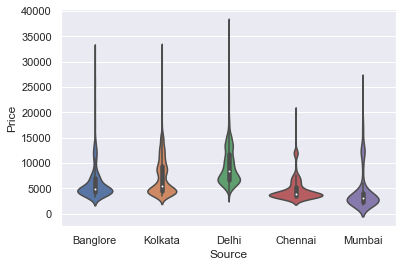

In [125]:
sns.violinplot(x="Source",y="Price",data=train)

In [127]:
source=pd.get_dummies(train["Source"])

source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0
5,0,0,0,1,0


In [128]:
train.Destination.value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

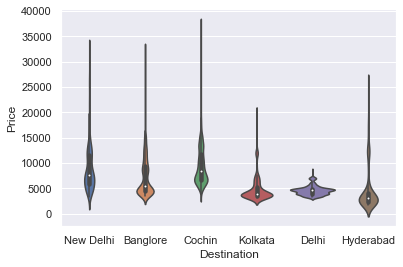

In [129]:
sns.violinplot(x="Destination",y="Price",data=train)

In [130]:
dest=pd.get_dummies(train.Destination)

In [131]:
dest.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
5,1,0,0,0,0,0


In [132]:
train.drop("Route",axis=1,inplace=True)

In [133]:
train.drop("Additional_Info",axis=1,inplace=True)

In [134]:
train.Total_Stops.value_counts()

1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [135]:
train["Total_Stops"]=train.Total_Stops.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [136]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2,25


In [137]:
train_data = pd.concat([train,airline,source,dest],axis=1)

In [138]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hrs,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,2019,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,2019,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2,25,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [139]:
train.shape

(6827, 14)

In [141]:
train.shape

(6827, 14)

In [140]:
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [142]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_Month,Journey_Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,Duration_hrs,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,2019,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,6218,5,12,2019,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,3,1,2019,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,2019,9,0,11,25,2,25,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [143]:
train_data.shape

(6827, 32)

In [56]:
## Data leakage is the reason we don't combine Test and Train data for pre-processing and could lead to overfitting.
## So we should process train and test data seperately

## Test Data

In [165]:
test_data=pd.read_excel(r"Test_set.xlsx")

In [174]:

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 1 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1772 non-null   object
 1   Date_of_Journey  1772 non-null   object
 2   Source           1772 non-null   object
 3   Destination      1772 non-null   object
 4   Route            1772 non-null   object
 5   Dep_Time         1772 non-null   object
 6   Arrival_Time     1772 non-null   object
 7   Duration         1772 non-null   object
 8   Total_Stops      1772 non-null   object
 9   Additional_Info  1772 non-null   object
dtypes: object(10)
memory usage: 152.3+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [175]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,1 stop,No info,12,3,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,1 stop,No info,1,5,15,15,20,30,5,15


In [172]:
test_data.Airline.value_counts()

IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64

In [169]:
f1 = test_data.Airline=="Jet Airways"
f2 = test_data.Airline=="Jet Airways Business"

In [170]:
test_data=test_data[~f1]

In [171]:
test_data=test_data[~f2]

<ipython-input-171-53edf438811d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data=test_data[~f2]


In [176]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"])

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"])

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"])

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Airline
---------------------------------------------------------------------------
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       800
Kolkata     406
Banglore    355
Mumbai      136
Chennai      75
Name: Source, dtype: int64
Destination
---------------------------------------------------------------------------
Cochin       800
Banglore     406
Delhi        226
Hyderabad    136
New Delhi    129
Kolkata       75
Name: Destination, dtype: int64


Shape of test data :  (1772, 29)


In [177]:
a=pd.get_dummies(test_data.Airline)
s=pd.get_dummies(test_data.Source)
d=pd.get_dummies(test_data.Destination)

In [178]:
test_data=pd.concat([test_data,a,s,d],axis=1)
test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [179]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,1,12,3,7,30,22,35,15,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [180]:
test_data.shape

(1772, 29)

In [160]:
X=train_data.drop("Price",axis=1)

In [161]:
y=train_data["Price"]

In [186]:
X.shape,y.shape,test_data.shape

((6827, 29), (6827,), (1772, 29))

In [185]:
X.drop(["Journey_Year","Trujet"],axis=1,inplace=True)

C:\Users\arpan\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [182]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_Month', 'Journey_Year',
       'Dep_Time_hr', 'Dep_Time_min', 'Arrival_Time_hr', 'Arrival_Time_min',
       'Duration_hrs', 'Duration_mins', 'Air Asia', 'Air India', 'GoAir',
       'IndiGo', 'Multiple carriers', 'Multiple carriers Premium economy',
       'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Banglore',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Banglore', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [184]:
test_data.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [187]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

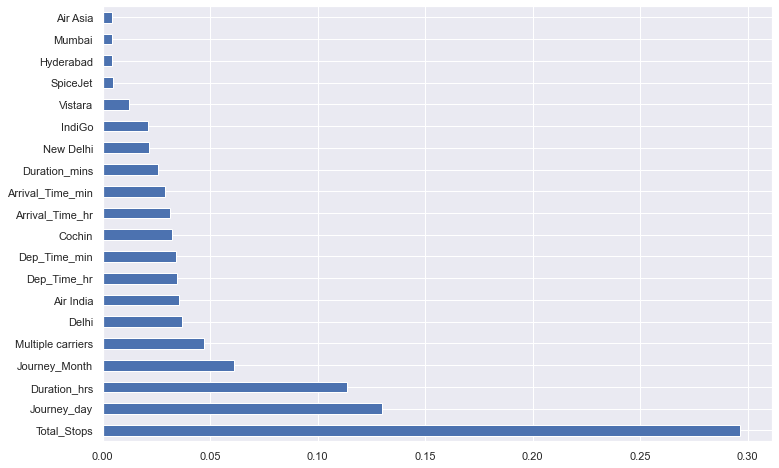

In [188]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lr=LinearRegression()

In [193]:
lr.fit(X_train,y_train)

LinearRegression()

In [194]:
pred_lr=lr.predict(X_test)

In [195]:
from sklearn.metrics import mean_absolute_error

In [196]:
mean_absolute_error(y_test,pred_lr)

1624.5690182972658

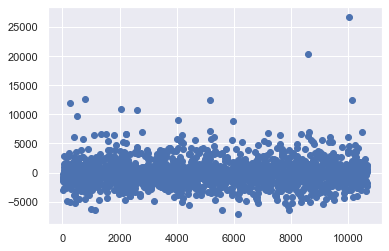

In [197]:
g=plt.plot(y_test - pred_lr,marker='o',linestyle='')

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
dtr=DecisionTreeClassifier()

In [202]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [203]:
pred_dtr=dtr.predict(X_test)

In [204]:
mean_absolute_error(y_test,pred_dtr)

948.522554188635

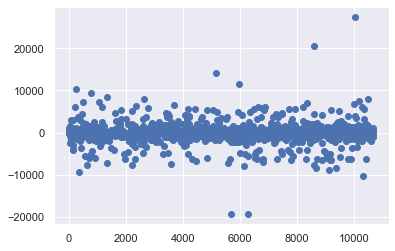

In [205]:
g=plt.plot(y_test - pred_dtr,marker='o',linestyle='')

In [206]:
from sklearn.svm import SVR

In [207]:
svr=SVR()

In [208]:
svr.fit(X_train,y_train)

SVR()

In [209]:
pred_svr=svr.predict(X_test)

In [210]:
mean_absolute_error(y_test,pred_svr)

2855.8137179494943

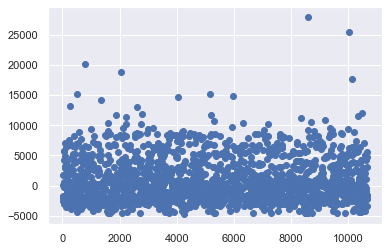

In [211]:
g=plt.plot(y_test - pred_svr,marker='o',linestyle='')

In [212]:
from sklearn.ensemble import RandomForestRegressor

In [213]:
rfr=RandomForestRegressor()

In [214]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [215]:
pred_rfr=rfr.predict(X_test)

In [217]:
mean_absolute_error(y_test,pred_rfr)

753.8334764833878

In [218]:
from sklearn.linear_model import Ridge

In [219]:
ridge=Ridge()

In [220]:
ridge.fit(X_train,y_train)

Ridge()

In [221]:
pred_ridge=ridge.predict(X_test)

In [222]:
mean_absolute_error(y_test,pred_ridge)

1623.328337969515

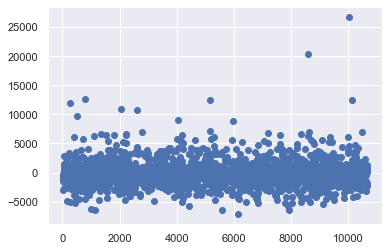

In [223]:
g=plt.plot(y_test - pred_ridge,marker='o',linestyle='')

In [224]:
from sklearn.linear_model import Lasso

In [225]:
lasso=Lasso()

In [226]:
lasso.fit(X_train,y_train)

C:\Users\arpan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55023126.59206009, tolerance: 7697488.110212189
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [227]:
pred_lasso=lasso.predict(X_test)

In [228]:
mean_absolute_error(y_test,pred_lasso)

1623.1437983101716

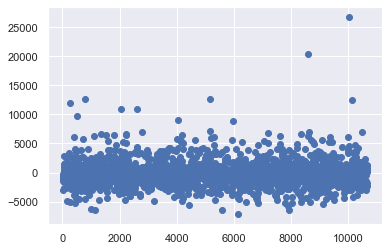

In [229]:
g=plt.plot(y_test - pred_lasso,marker='o',linestyle='')

## From our calculations we found out the best performing model for this problem set is Random Forest Regression.

## We will now perform Hyperparameter Tuning on this Model

from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)

rf_random.best_params_

In [117]:
pred_rf=rf_random.predict(X_test)

In [120]:
mean_absolute_error(y_test,pred_rf)

808.6201798303232

In [121]:
mean_absolute_error(y_test,pred_rfr)

752.3471301108415

In [236]:
test_data.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [238]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,1,12,3,7,30,22,35,15,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [237]:
test_data.shape

(1772, 29)

In [239]:
test_data.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

## Save the model

In [230]:
import pickle

In [234]:
file = open('flight_model.pkl', 'wb')

In [235]:
pickle.dump(rfr,file)